---
# Nonlinear Regression
### Predicting China's GDP with *Polynomial Regression*
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

`SciPy`- provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.

In [2]:
URL="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
df = pd.read_csv(URL)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,55.0,1.987000e+03,1.602082e+01,1.960000e+03,1.973500e+03,1.987000e+03,2.000500e+03,2.014000e+03
Value,55.0,1.437042e+12,2.500085e+12,4.668518e+10,1.395123e+11,3.074796e+11,1.268748e+12,1.035483e+13


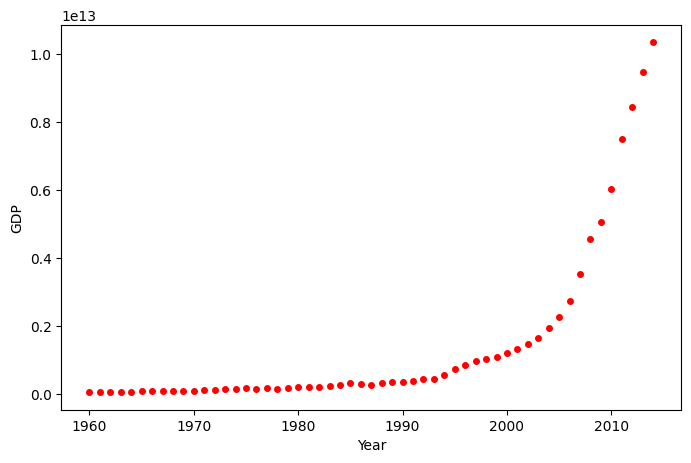

In [5]:
plt.figure(figsize=[8, 5])
plt.plot('Year', 'Value', 'ro', markersize=4, data=df)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

### Normalizing data

In [6]:
X = np.asanyarray(df[['Year']] / df['Year'].max())
y = np.asanyarray(df[['Value']] / df['Value'].max())

In [7]:
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(55, 1)
y.shape=(55, 1)


### Linear Regression

In [8]:
LR_model = LinearRegression()
LR_model.fit(X, y)

LinearRegression()

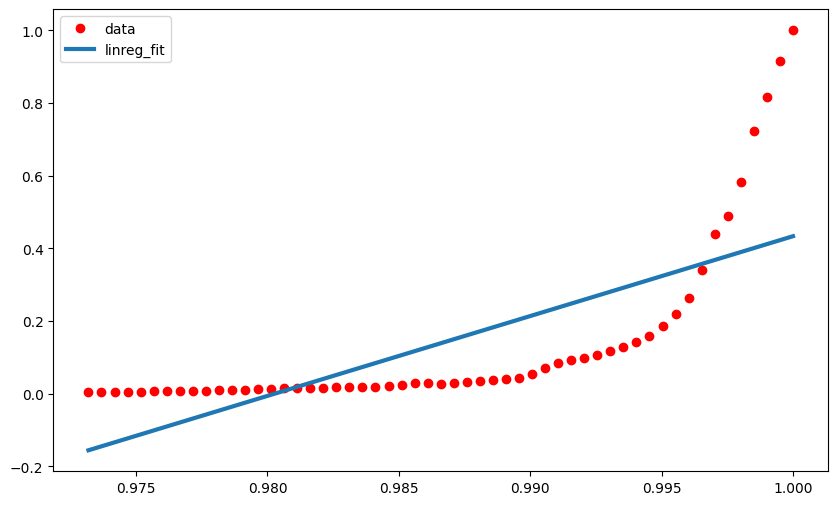

In [9]:
y_hat_linreg = LR_model.predict(X)

plt.figure(figsize=[10, 6])
plt.plot(X, y, 'ro', label='data')
plt.plot(X, y_hat_linreg, linewidth=3, label='linreg_fit')
plt.legend(loc='best');

In [10]:
MAE = metrics.mean_absolute_error(y, y_hat_linreg)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_hat_linreg))

print(f"{MAE=}")
print(f"{RMSE=}")

MAE=0.12657979406214762
RMSE=0.1650608155199123


### Polynomial Regression

In [11]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [12]:
X_poly[:5]

array([[0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725],
       [0.97368421, 0.94806094, 0.92311197, 0.89881955, 0.8751664 ],
       [0.97418073, 0.9490281 , 0.9245249 , 0.90065434, 0.87740011],
       [0.97467726, 0.94999576, 0.92593926, 0.90249194, 0.87963837],
       [0.97517378, 0.95096391, 0.92735507, 0.90433235, 0.8818812 ]])

In [13]:
LR_model.fit(X_poly, y)

LinearRegression()

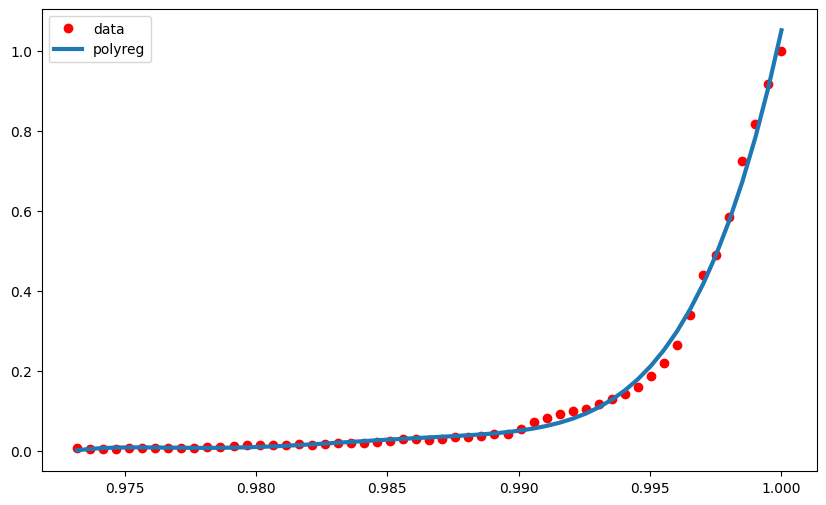

In [14]:
y_hat_polyreg = LR_model.predict(X_poly)

plt.figure(figsize=[10, 6])
plt.plot(X, y, 'ro', label='data')
plt.plot(X, y_hat_polyreg, linewidth=3, label='polyreg')
plt.legend(loc='best');

In [15]:
MAE = metrics.mean_absolute_error(y, y_hat_polyreg)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_hat_polyreg))

print(f"{MAE=}")
print(f"{RMSE=}")

MAE=0.009253960919999624
RMSE=0.01519356957337065


### `scipy.optimize.curve_fit`

`curve_fit` is used for fitting a given set of data points to a user-defined function. It takes in three arguments: the `function` to be fitted, the `x` and `y` data points to fit the function to.

For example, with the data have can be more accurately predicted using the *Logistic Regression* function:

### $$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}} $$

In [16]:
x_data, y_data = df["Year"].values, df["Value"].values
x_data = x_data/max(x_data)
y_data = y_data/max(y_data)

In [17]:
print(f'{x_data.shape=}')
print(f'{y_data.shape=}')

x_data.shape=(55,)
y_data.shape=(55,)


In [18]:
def sigmiod(x, beta1, beta2):
    y = 1 / (1 + np.exp(-beta1 * (x - beta2)))
    return y

In [19]:
beta, pcov = curve_fit(sigmiod, x_data, y_data)
print("coefficients:", beta)

coefficients: [690.45171182   0.99720713]


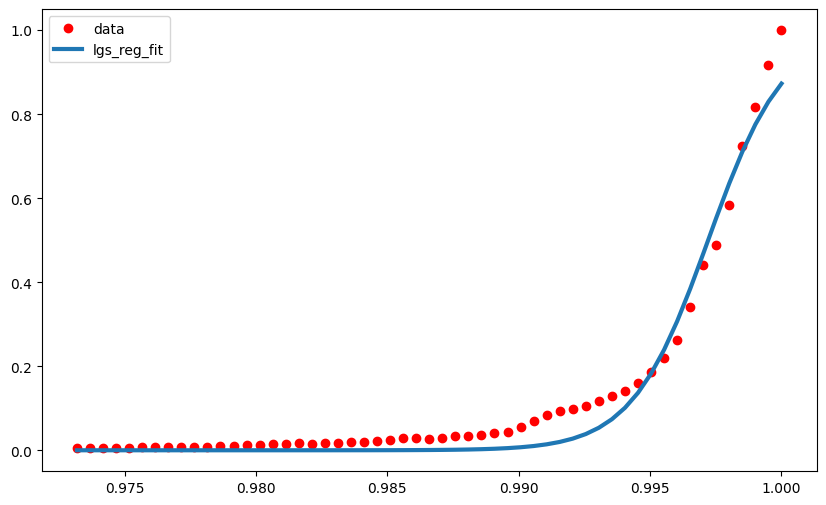

In [20]:
# np.linspace(1960, 2014, 55)
y_hat_lgsreg = sigmiod(x_data, *beta)

plt.figure(figsize=[10, 6])
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x_data, y_hat_lgsreg, linewidth=3, label='lgs_reg_fit')
plt.legend(loc='best');

In [21]:
MAE = metrics.mean_absolute_error(y_data, y_hat_lgsreg)
RMSE = np.sqrt(metrics.mean_squared_error(y_data, y_hat_lgsreg))

print(f"{MAE=}")
print(f"{RMSE=}")

MAE=0.030495070483159446
RMSE=0.03945247147605772
